# 📊 Executive Business Intelligence Dashboard
**Automated insights for data-driven decisions**

In [1]:
config = {
    'input_file': 'data/buenacarne/sample_completeDet.csv',  # Input CSV file
    'analysis_date': '2018-01-21',      # Or 'current' for today
    'top_products_threshold': 0.2,      # Top 20% products
    'dead_stock_days': 30,              # Days without sales to consider dead stock
    'currency_format': 'CLP',           # Chilean Peso
    'date_col': 'fecha',                # Date column
    'product_col': 'producto',          # Product column
    'description_col': 'glosa',         # Description column
    'revenue_col': 'total',             # Revenue column
    'quantity_col': 'cantidad',         # Quantity column
    'transaction_col': 'trans_id'       # Transaction ID column
}

In [2]:
from modules.business_analytics import BusinessAnalyzer
from modules.dashboard import ExecutiveDashboard

# Load data and initialize
analyzer = BusinessAnalyzer(
    data_source=config['input_file'],
    config=config
)

dashboard = ExecutiveDashboard(analyzer)

## 🎯 Executive Summary

In [3]:
print(dashboard.create_quick_summary())

EXECUTIVE SUMMARY

📊 KEY METRICS:
  • Total Revenue: $ 40.608.696
  • Growth Rate: 0.0%
  • Transactions: 988

💡 KEY INSIGHTS:
  • Top 20% of products = 46.3% of revenue
  • Inventory Health: 100% healthy
  • Dead Stock: 0 products



## 📈 Comprehensive Dashboard

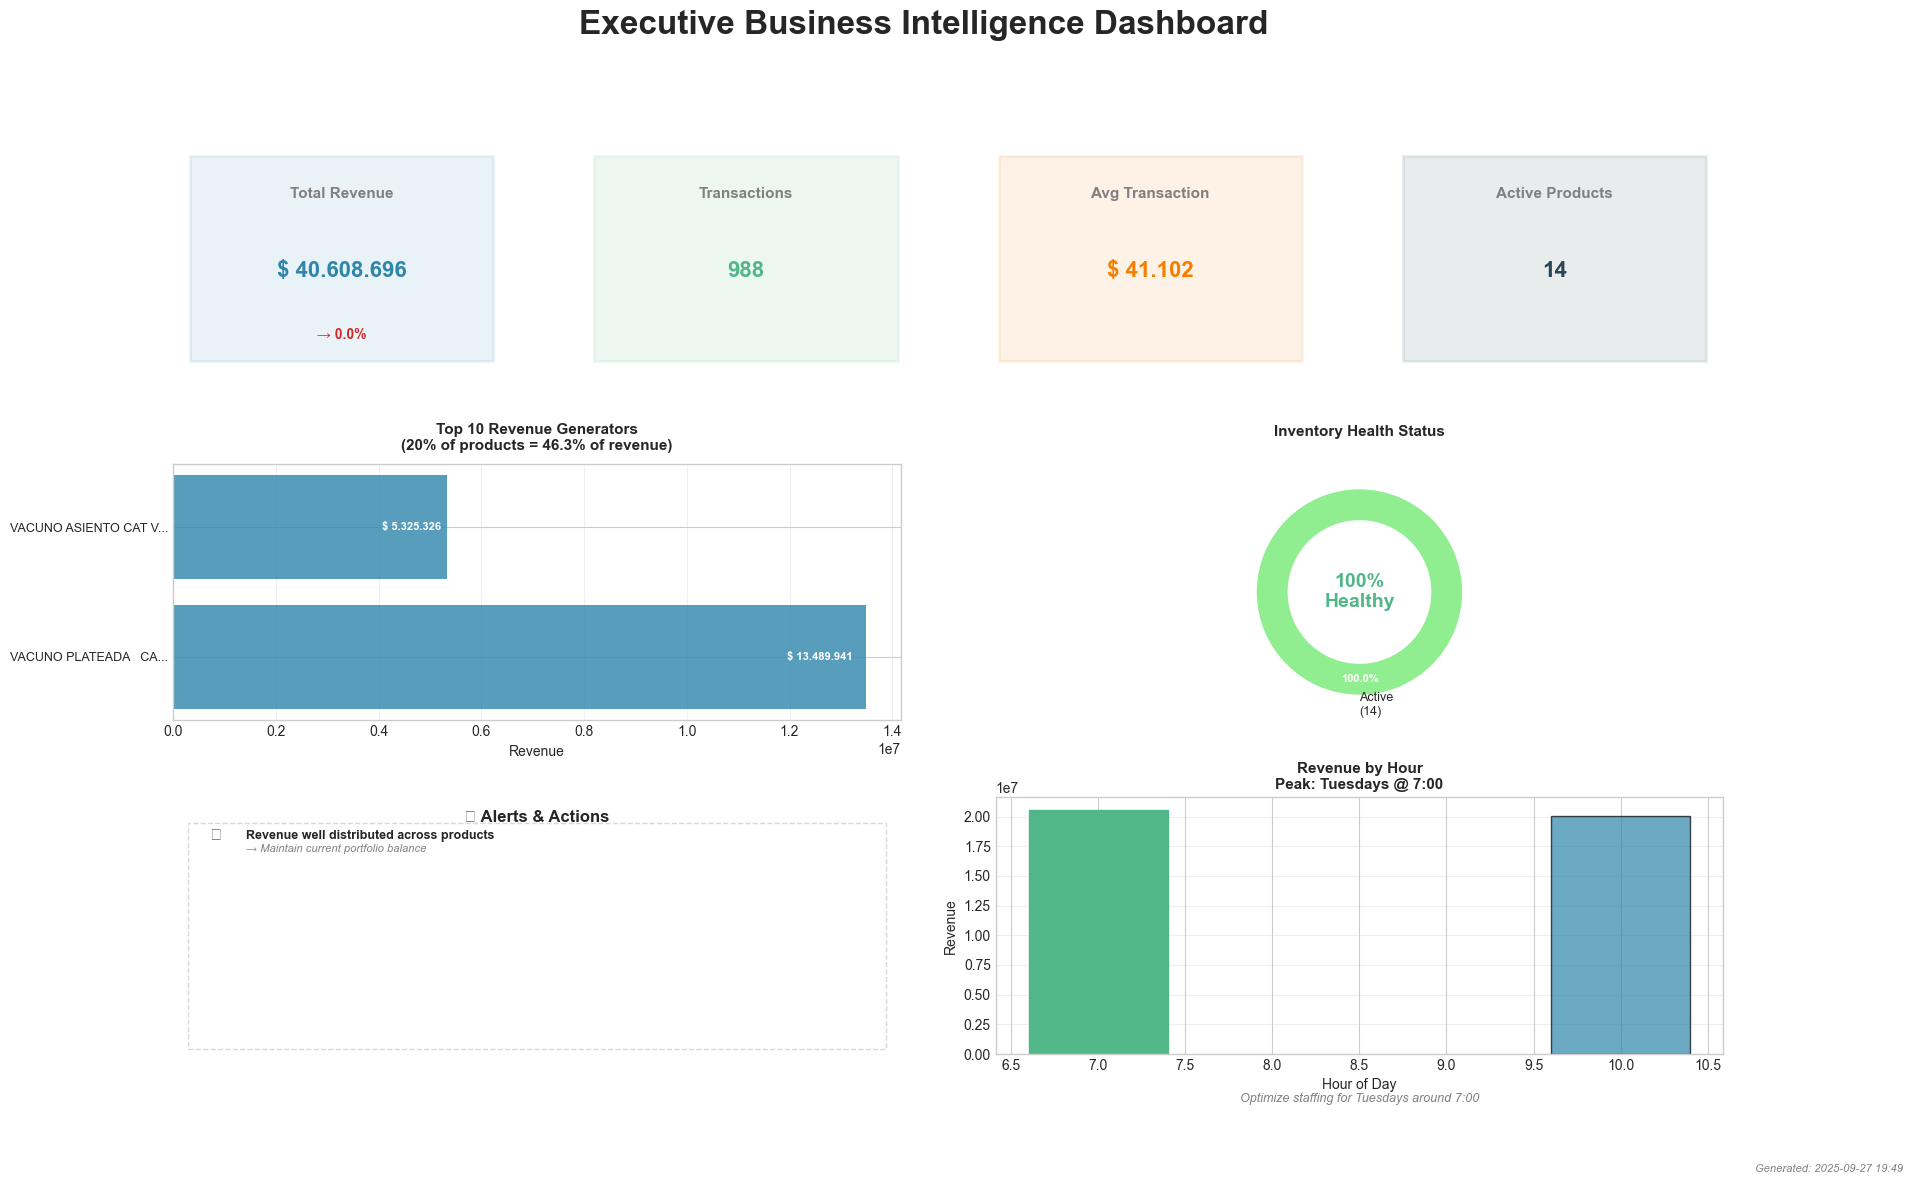

In [4]:
# Create and display the executive dashboard
fig = dashboard.create_full_dashboard(figsize=(20, 12))

## 💰 Revenue Concentration Analysis

In [5]:
pareto = analyzer.get_pareto_insights()
print(f"🎯 TOP INSIGHT: Your top {pareto['top_products_count']} products "
      f"({pareto['top_products_pct']:.0f}% of catalog) generate "
      f"{pareto['revenue_from_top_pct']:.1f}% of revenue!")

print(f"\nConcentration Risk Level: {pareto['concentration_level']}")

print("\n📋 Top 5 Revenue Generators:")
for i, product in enumerate(pareto['top_products_list'][:5], 1):
    print(f"  {i}. {product['glosa']}: {analyzer.format_currency(product['total'])}")


🎯 TOP INSIGHT: Your top 2 products (20% of catalog) generate 46.3% of revenue!

Concentration Risk Level: Low

📋 Top 5 Revenue Generators:
  1. VACUNO PLATEADA   CAT V  ENTERA NAC: $ 13.489.941
  2. VACUNO ASIENTO CAT V ENTERO NAC: $ 5.325.326


## 📦 Inventory Health Check

In [6]:
inventory = analyzer.get_inventory_health()
print(f"📊 Inventory Health Score: {inventory['healthy_stock_pct']:.0f}%")
print(f"\n⚠️ Dead Stock Alert: {inventory['dead_stock_count']} products")

if inventory['at_risk_products']:
    print("\n🟡 Products At Risk (Slowing):")
    for product in inventory['at_risk_products'][:3]:
        print(f"  • {product['glosa']}: {product['days_since_sale']} days since last sale")


📊 Inventory Health Score: 100%

⚠️ Dead Stock Alert: 0 products


## ⏰ Operational Efficiency

In [7]:
peak_times = analyzer.get_peak_times()

print(f"⏰ Peak Performance Windows:")
print(f"  • Best Day: {peak_times['peak_day']}s")
print(f"  • Peak Hour: {peak_times['peak_hour']}:00")
print(f"  • Slowest Day: {peak_times['valley_day']}s")
print(f"\n💡 {peak_times['recommendation']}")

⏰ Peak Performance Windows:
  • Best Day: Tuesdays
  • Peak Hour: 7:00
  • Slowest Day: Tuesdays

💡 Optimize staffing for Tuesdays around 7:00


## 🚨 Alerts & Actions

In [8]:
alerts = analyzer.get_alerts()

if alerts['critical']:
    print("🔴 CRITICAL ACTIONS REQUIRED:")
    for alert in alerts['critical']:
        print(f"\n  {alert['message']}")
        print(f"  Impact: {alert['impact']}")
        print(f"  ➔ Action: {alert['action']}")

if alerts['warning']:
    print("\n🟡 WARNINGS:")
    for alert in alerts['warning']:
        print(f"\n  {alert['message']}")
        print(f"  ➔ Action: {alert['action']}")

if alerts['success']:
    print("\n🟢 SUCCESS INDICATORS:")
    for alert in alerts['success']:
        print(f"\n  {alert['message']}")
        print(f"  ➔ Next Step: {alert['action']}")


🟢 SUCCESS INDICATORS:

  Revenue well distributed across products
  ➔ Next Step: Maintain current portfolio balance


## 📊 Export Options

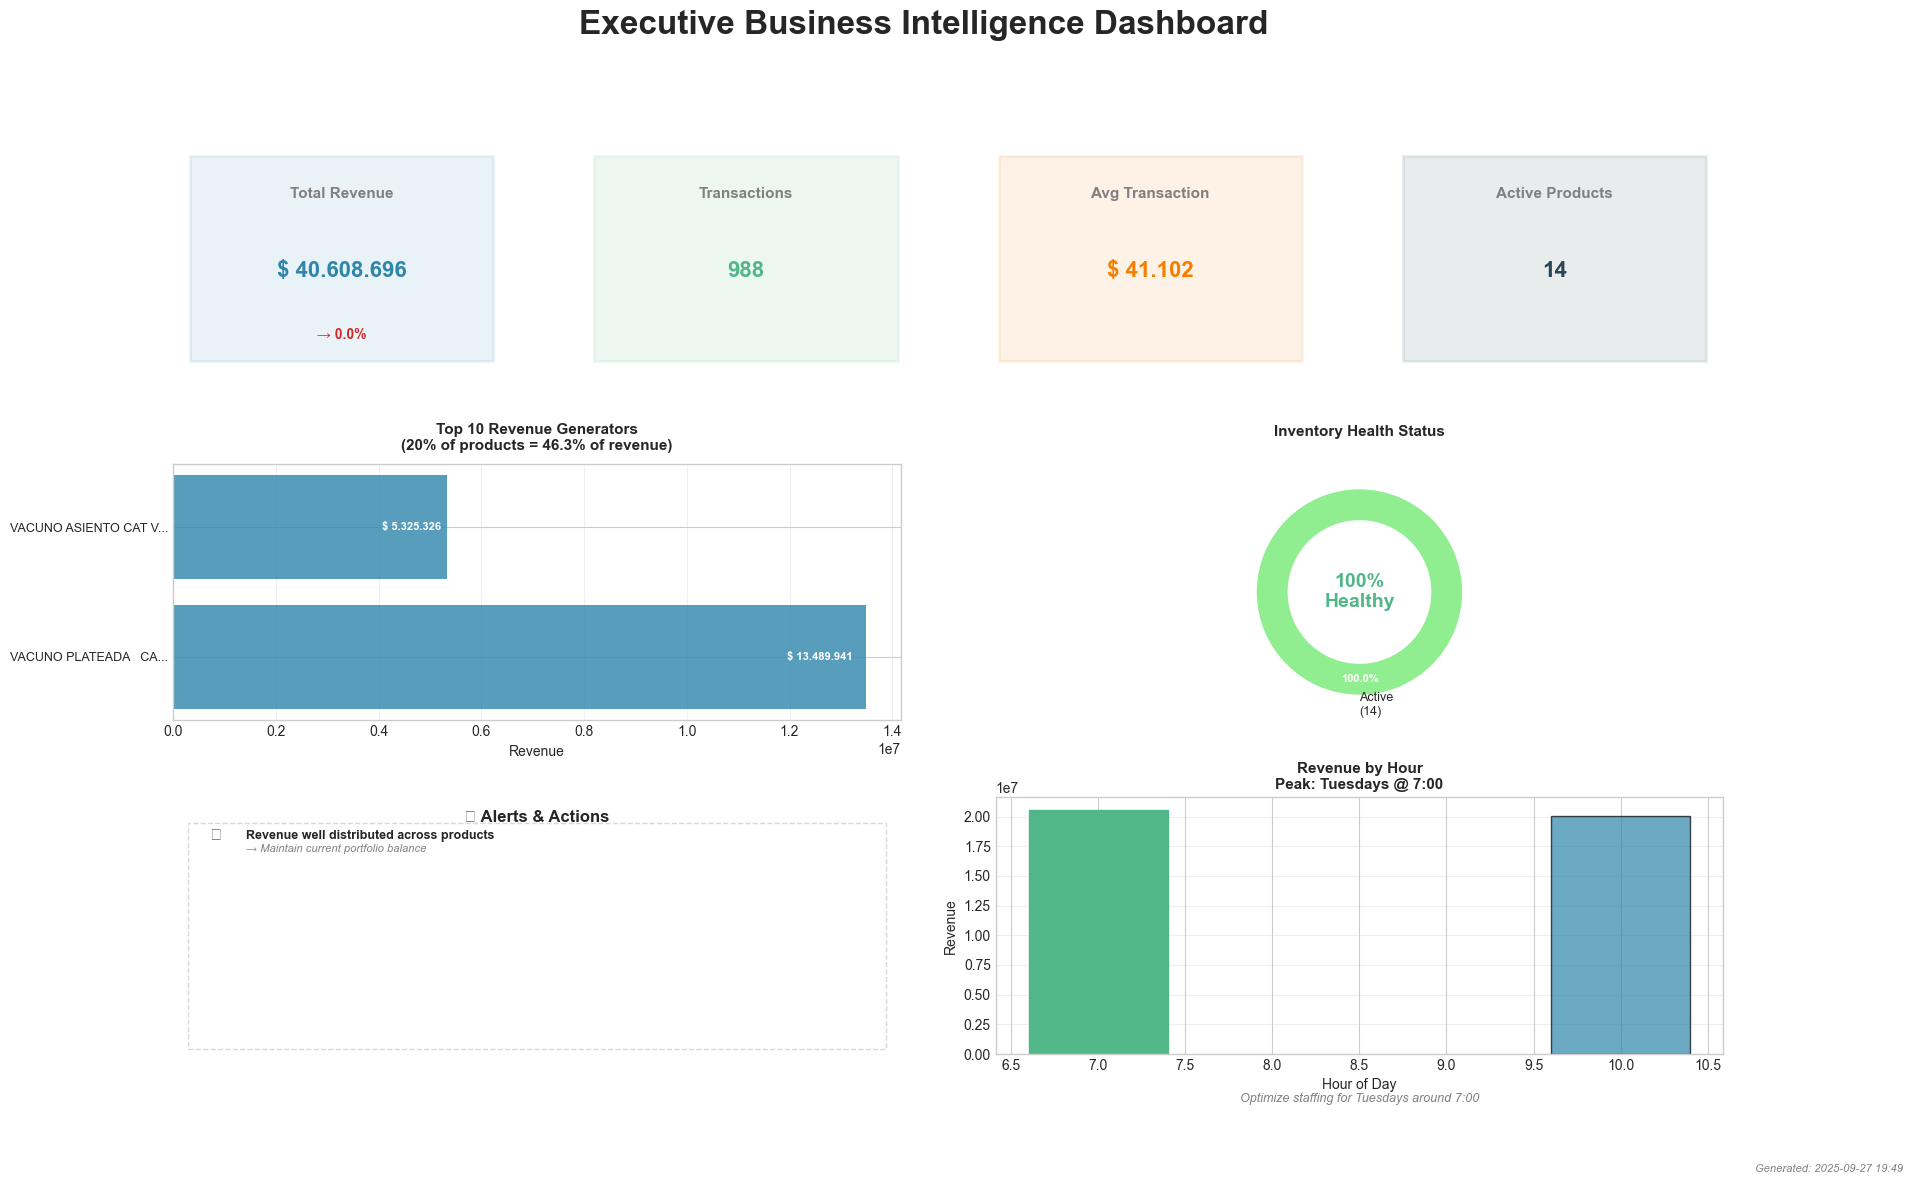

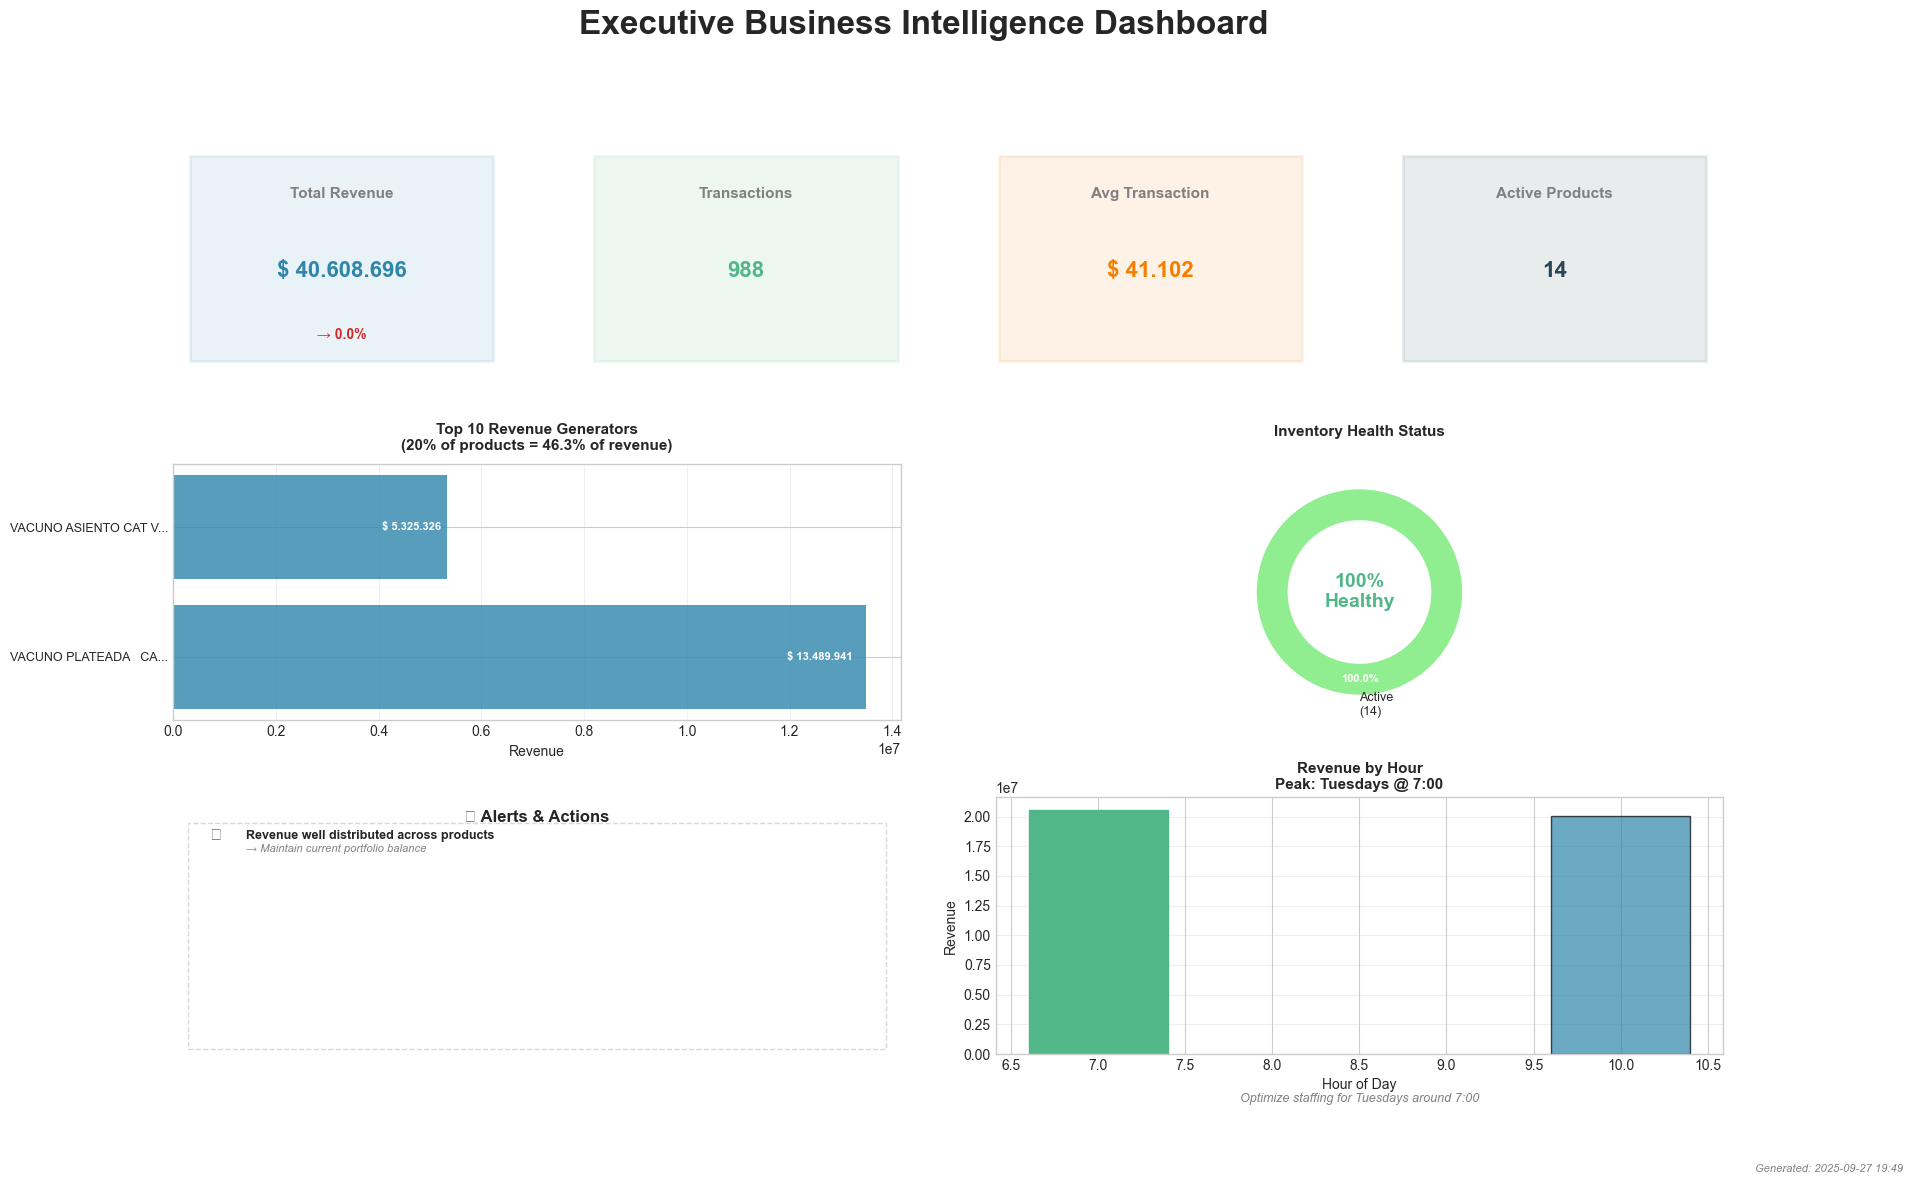

In [9]:
# Save dashboard as high-resolution image
dashboard.create_full_dashboard(save_path='executive_dashboard.png')


In [10]:
# Export key metrics to CSV
import pandas as pd

# Create summary dataframe
summary_df = pd.DataFrame([{
    'Date': config['analysis_date'],
    'Total Revenue': analyzer.get_kpis()['total_revenue'],
    'Revenue Growth %': analyzer.get_kpis()['revenue_growth'],
    'Total Transactions': analyzer.get_kpis()['total_transactions'],
    'Top 20% Revenue Share': analyzer.get_pareto_insights()['revenue_from_top_pct'],
    'Dead Stock Count': analyzer.get_inventory_health()['dead_stock_count'],
    'Inventory Health %': analyzer.get_inventory_health()['healthy_stock_pct']
}])

# Save to CSV
summary_df.to_csv('executive_summary.csv', index=False)
print("✅ Dashboard exported to 'executive_dashboard.png'")
print("✅ Metrics exported to 'executive_summary.csv'")

✅ Dashboard exported to 'executive_dashboard.png'
✅ Metrics exported to 'executive_summary.csv'
